## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""

from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for num in [5,10,25]:

    earlystop = EarlyStopping(monitor="val_accuracy",
                             patience=num,
                             verbose=1)

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True,momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train,y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test,y_test),
             shuffle=True,
             callbacks=[earlystop]
             )
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp = "EarlyStop = " + str(num)
    results[exp] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 6s 129us/step - loss: 2.1877 - accuracy: 0.2678 - val_loss: 2.1186 - val_accuracy: 0.2207
Epoch 2/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7412 - accuracy: 0.3919 - val_loss: 1.9540 - val_accuracy: 0.3077
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6181 - accuracy: 0.4328 - val_loss: 1.8348 - val_accuracy: 0.3519
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5451 - accuracy: 0.4610 - val_loss: 1.7164 - val_accuracy: 0.3978
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4894 - accuracy: 0.4802 - val_loss: 1.6503 - val_accuracy: 0.4244
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4470 - accuracy: 0.4954 - val_loss: 1.6062 - val_accuracy: 0.4360
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4070 - accuracy: 0.5107 - val_loss: 1.559

50000/50000 [==============================] - 6s 119us/step - loss: 1.6185 - accuracy: 0.4353 - val_loss: 1.8268 - val_accuracy: 0.3684
Epoch 4/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5473 - accuracy: 0.4594 - val_loss: 1.7170 - val_accuracy: 0.4086
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4954 - accuracy: 0.4772 - val_loss: 1.6484 - val_accuracy: 0.4266
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4501 - accuracy: 0.4947 - val_loss: 1.5933 - val_accuracy: 0.4391
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4101 - accuracy: 0.5079 - val_loss: 1.5504 - val_accuracy: 0.4522
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3754 - accuracy: 0.5203 - val_loss: 1.5339 - val_accuracy: 0.4581
Epoch 9/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.3440 - accuracy: 0.5312 - val_loss: 1.517

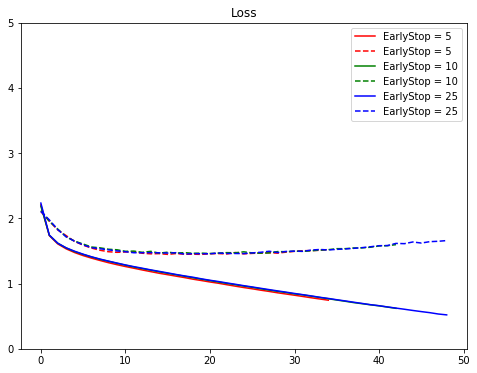

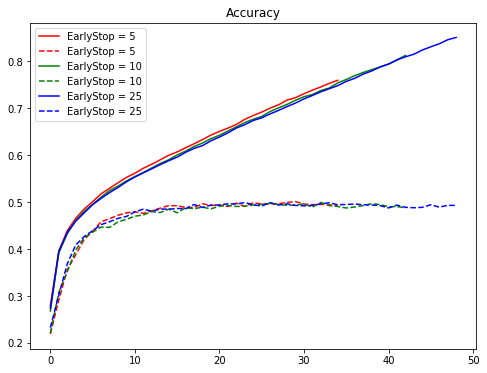

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()